In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('glass.csv')
var_names = list(df.columns)
labels = df.to_numpy('int')[:, -1]
data = df.to_numpy('float')[:, :-1]

In [3]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

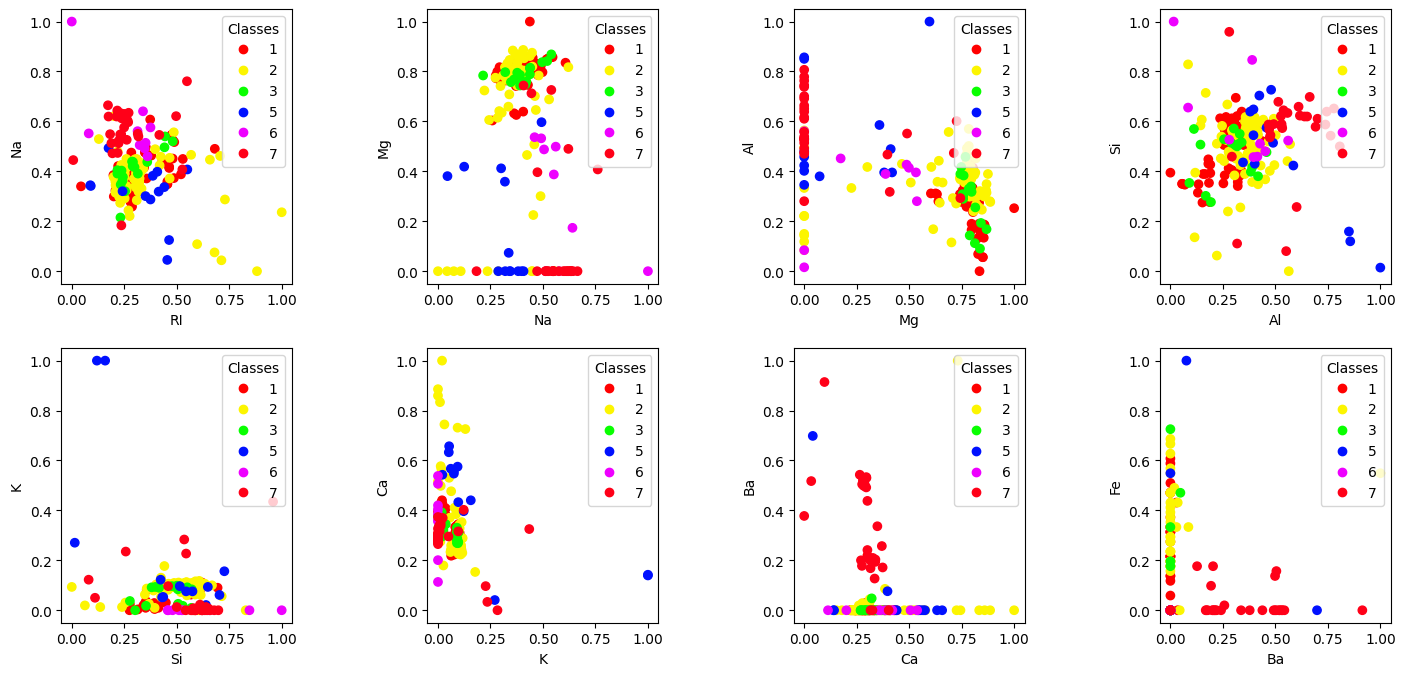

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4)
fig.tight_layout()
fig.set_figheight(7)
fig.set_figwidth(15)

for i in range(data.shape[1] - 1):
    scatter = axs[i // 4, i % 4].scatter(data[:, i], data[:, (i + 1)], c=labels, cmap='hsv')
    legend = axs[i // 4, i % 4].legend(*scatter.legend_elements(),
                                       loc="upper right", title="Classes")
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit(data).transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


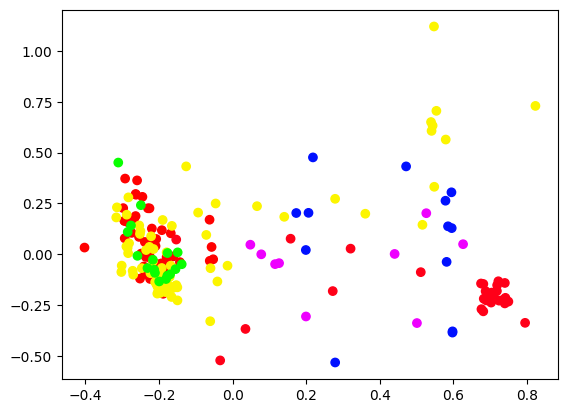

In [6]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

PCA нужен для выделения наиболее значимая информация из всего dataset

In [7]:
pca = PCA(n_components=4)
pca_data = pca.fit(data).transform(data)

print(f'При 4 компонентах объясняют не менее 85% дисперсии данных')
print(sum(pca.explained_variance_ratio_))

При 4 компонентах объясняют не менее 85% дисперсии данных
0.8586697305102716


In [8]:
pca = pca.inverse_transform(pca_data)
pca

array([[ 4.13560332e-01,  4.05127229e-01,  9.91335006e-01, ...,
         3.15113379e-01,  6.39064458e-03, -8.87821104e-03],
       [ 2.60258278e-01,  4.20059042e-01,  8.03878083e-01, ...,
         2.43815054e-01,  1.93211025e-02, -1.32425330e-02],
       [ 2.10728114e-01,  4.17649388e-01,  7.84256266e-01, ...,
         2.15681099e-01,  1.21664495e-02, -8.71190711e-05],
       ...,
       [ 3.02867072e-01,  5.35668189e-01, -3.58278663e-02, ...,
         3.54691809e-01,  3.32142653e-01, -2.03589677e-02],
       [ 2.24560124e-01,  5.30192555e-01, -2.81019256e-02, ...,
         3.07515795e-01,  3.02184760e-01, -2.50996532e-02],
       [ 2.46086641e-01,  5.39981995e-01, -3.37627086e-02, ...,
         3.10339068e-01,  3.35966543e-01, -1.55855374e-02]])

In [9]:
data

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

Эти данные похожи на изначальные, но отличаются из за дисперсии 85%. При дисперсии двух компонентов данные отличаются намного больше


In [10]:
parameters = ('auto', 'full', 'arpack', 'randomized')
for parameter in parameters:
    print(f'Параметр: {parameter}')
    pca = PCA(n_components=4, svd_solver=parameter)
    pca_data = pca.fit(data).transform(data)
    print(pca_data)
    print('*' * 50)

Параметр: auto
[[-4.02106406e-01  3.27066975e-02 -1.67050356e-01  1.92195203e-01]
 [-2.06319788e-01 -1.44705307e-01 -8.19230734e-02  2.05493779e-02]
 [-1.88617003e-01 -1.94853604e-01 -4.46961577e-02 -3.44663484e-02]
 [-2.37208477e-01 -9.70644677e-02 -8.63357190e-02  1.50685878e-02]
 [-2.23972190e-01 -1.21779151e-01 -8.73951860e-02 -5.32275854e-02]
 [-2.38343376e-01  6.01961887e-02  4.04603720e-01 -1.09362324e-01]
 [-2.25779812e-01 -1.07449689e-01 -1.00098305e-01 -6.05857463e-02]
 [-2.34800324e-01 -9.28817916e-02 -1.10631803e-01 -8.86689588e-02]
 [-1.96420004e-01 -6.89746231e-02 -1.07524570e-01  1.28297548e-01]
 [-2.26074680e-01 -3.65788388e-03  1.01949643e-01 -6.90299055e-02]
 [-2.09164891e-01  4.00937901e-02  3.68335095e-01 -1.49791528e-01]
 [-2.31471612e-01 -8.27551882e-02 -8.90323459e-02 -5.40371250e-02]
 [-2.12382788e-01  5.20902469e-02  3.48476614e-01 -1.63710873e-01]
 [-2.33643459e-01  5.60754213e-02  1.93160797e-01 -1.24595242e-01]
 [-2.15589511e-01 -9.27878222e-02 -8.16423819e-

In [11]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2)
kernel_pca_data = kernel_pca.fit(data).transform(data)
kernel_pca_data

array([[-4.02106406e-01,  3.27066975e-02],
       [-2.06319788e-01, -1.44705307e-01],
       [-1.88617003e-01, -1.94853604e-01],
       [-2.37208477e-01, -9.70644677e-02],
       [-2.23972190e-01, -1.21779151e-01],
       [-2.38343376e-01,  6.01961887e-02],
       [-2.25779812e-01, -1.07449689e-01],
       [-2.34800324e-01, -9.28817916e-02],
       [-1.96420004e-01, -6.89746231e-02],
       [-2.26074680e-01, -3.65788388e-03],
       [-2.09164891e-01,  4.00937901e-02],
       [-2.31471612e-01, -8.27551882e-02],
       [-2.12382788e-01,  5.20902469e-02],
       [-2.33643459e-01,  5.60754213e-02],
       [-2.15589511e-01, -9.27878222e-02],
       [-2.10275625e-01, -9.24555840e-02],
       [-2.40970549e-01, -6.03327681e-02],
       [-2.74049249e-01,  1.05050258e-01],
       [-2.35649810e-01, -1.33111972e-02],
       [-1.84782225e-01, -6.71381503e-02],
       [-2.20192190e-01,  7.68746710e-02],
       [-2.92920109e-01,  7.85024823e-02],
       [-2.22716712e-01, -7.41155597e-02],
       [-2.

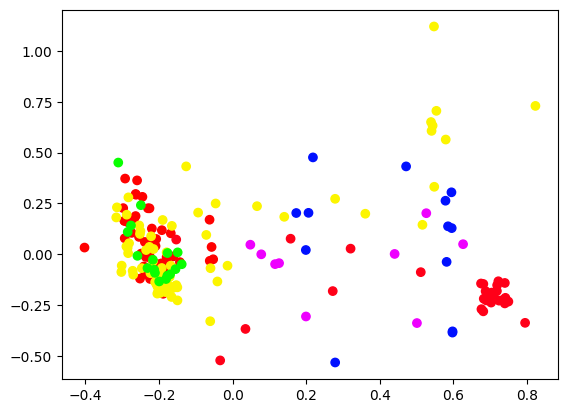

In [12]:
plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

In [13]:
parameters = ('linear', 'poly', 'rbf', 'sigmoid', 'cosine')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    kernel_pca = KernelPCA(n_components=4, kernel=parameter)
    kernel_pca_data = kernel_pca.fit(data).transform(data)
    print(kernel_pca_data)
    print('*' * 50)

Параметр: linear
[[-4.02106406e-01  3.27066975e-02 -1.67050356e-01  1.92195203e-01]
 [-2.06319788e-01 -1.44705307e-01 -8.19230734e-02  2.05493779e-02]
 [-1.88617003e-01 -1.94853604e-01 -4.46961577e-02 -3.44663484e-02]
 [-2.37208477e-01 -9.70644677e-02 -8.63357190e-02  1.50685878e-02]
 [-2.23972190e-01 -1.21779151e-01 -8.73951860e-02 -5.32275854e-02]
 [-2.38343376e-01  6.01961887e-02  4.04603720e-01 -1.09362324e-01]
 [-2.25779812e-01 -1.07449689e-01 -1.00098305e-01 -6.05857463e-02]
 [-2.34800324e-01 -9.28817916e-02 -1.10631803e-01 -8.86689588e-02]
 [-1.96420004e-01 -6.89746231e-02 -1.07524570e-01  1.28297548e-01]
 [-2.26074680e-01 -3.65788388e-03  1.01949643e-01 -6.90299055e-02]
 [-2.09164891e-01  4.00937901e-02  3.68335095e-01 -1.49791528e-01]
 [-2.31471612e-01 -8.27551882e-02 -8.90323459e-02 -5.40371250e-02]
 [-2.12382788e-01  5.20902469e-02  3.48476614e-01 -1.63710873e-01]
 [-2.33643459e-01  5.60754213e-02  1.93160797e-01 -1.24595242e-01]
 [-2.15589511e-01 -9.27878222e-02 -8.16423819

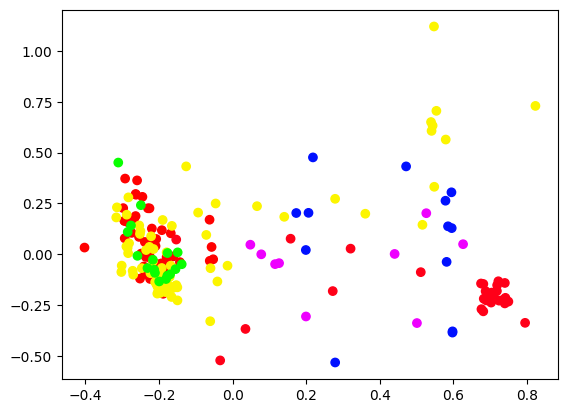

In [14]:
kernel_pca = KernelPCA(n_components=2, kernel='linear')
kernel_pca_data = kernel_pca.fit(data).transform(data)
plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

KernelPCA работает аналогично PCA при параметрах n_components=2 и kernel=linear

In [15]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components=2, alpha=1)
sparse_pca_data = sparse_pca.fit(data).transform(data)
sparse_pca_data

array([[-0.40407037, -0.11067627],
       [-0.20521691, -0.11067627],
       [-0.19214848, -0.11067627],
       [-0.22582697, -0.11067627],
       [-0.2109948 , -0.11067627],
       [-0.20443579,  0.39408009],
       [-0.20774008, -0.11067627],
       [-0.2109731 , -0.11067627],
       [-0.20070062, -0.11067627],
       [-0.20521691,  0.1028745 ],
       [-0.17211187,  0.35525268],
       [-0.21945394, -0.11067627],
       [-0.16734449,  0.35525268],
       [-0.1974459 ,  0.21935674],
       [-0.20358956, -0.11067627],
       [-0.19350306, -0.11067627],
       [-0.22291633, -0.11067627],
       [-0.26562742, -0.11067627],
       [-0.23589177, -0.11067627],
       [-0.18822733,  0.02521967],
       [-0.19272193,  0.25818415],
       [-0.25050076, -0.11067627],
       [-0.21042135, -0.11067627],
       [-0.19872919, -0.11067627],
       [-0.18561736, -0.11067627],
       [-0.19373244, -0.11067627],
       [-0.17823382, -0.11067627],
       [-0.17915134, -0.11067627],
       [-0.18680766,

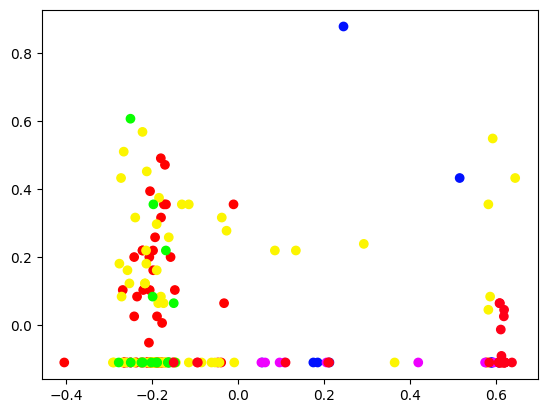

In [16]:
plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

In [17]:
parameters = ('lars', 'cd')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    sparse_pca = SparsePCA(n_components=4, alpha=0.01, method=parameter)
    sparse_pca_data = sparse_pca.fit(data).transform(data)
    print(sparse_pca_data)
    print('*' * 50)

Параметр: lars
[[-4.19860144e-01  1.09020572e-01 -1.22526911e-01  1.15435651e-01]
 [-2.19598500e-01 -8.28442862e-02 -1.27057492e-01 -3.05544576e-02]
 [-1.98623604e-01 -1.42507433e-01 -1.14089577e-01 -8.16258701e-02]
 [-2.42174798e-01 -3.84278866e-02 -1.05877536e-01 -3.65606372e-02]
 [-2.18665298e-01 -5.65828940e-02 -1.10896899e-01 -1.03245432e-01]
 [-2.13310362e-01 -1.33831929e-01  4.04988978e-01 -8.67383694e-02]
 [-2.16741413e-01 -3.75901030e-02 -1.13739045e-01 -1.10827961e-01]
 [-2.17685209e-01 -1.83750528e-02 -1.11684448e-01 -1.39198256e-01]
 [-2.21605586e-01 -9.52365388e-03 -1.26895619e-01  7.88693333e-02]
 [-2.08543670e-01 -4.47724731e-02  1.09568609e-01 -8.65879173e-02]
 [-1.78222300e-01 -1.32546739e-01  3.67258186e-01 -1.27968093e-01]
 [-2.20802135e-01 -2.16323992e-02 -9.36840556e-02 -1.02002895e-01]
 [-1.76447776e-01 -1.11787655e-01  3.58349177e-01 -1.43062697e-01]
 [-1.99990472e-01 -3.43773260e-02  2.23881967e-01 -1.25550068e-01]
 [-1.98233806e-01 -3.23402368e-02 -8.81588331e-

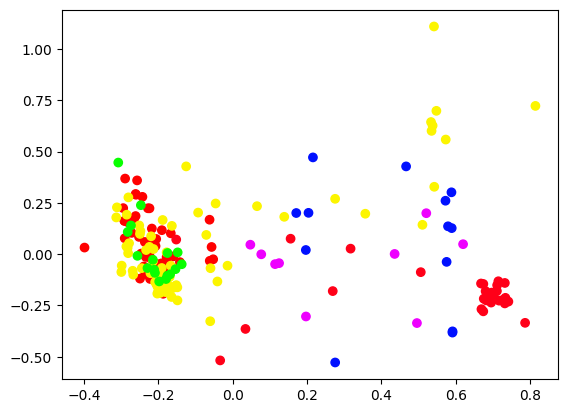

In [18]:
sparse_pca = SparsePCA(n_components=2, alpha=0)
sparse_pca_data = sparse_pca.fit(data).transform(data)

plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

SparsePCA работает аналогично PCA при параметрах n_components=2 и alpha=0

С одной стороны, мы показываем, что KernelPCA может найти проекцию данных, которая линейно разделяет их, чего нельзя сказать о PCA. Окончательно, мы показываем, что обращение этой проекции является аппроксимацией с помощью KernelPCA, тогда как с PCA оно является точным.
SparsePCA который пытается создавать легко интерпретируемые модели посредством разреженной загрузки.В SparsePCA каждый главный компонент представляет собой линейную комбинацию подмножества исходных переменных.

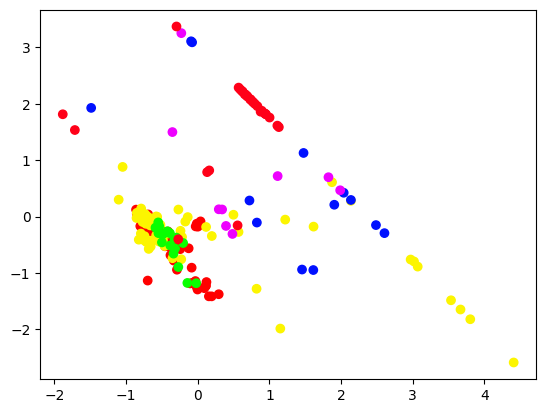

In [19]:
from sklearn.decomposition import FactorAnalysis
pca = FactorAnalysis(n_components = 2)
pca_data = pca.fit(data).transform(data)
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

В методе главных компонент при исследовании признаков ищется тоже таких факторов, что объясняет всю изменчивость исходной системы. А затем, те факторы, которые объясняют наименьшую долю изменчивости, отбрасываются как несущественные, за счет чего и достигается снижение размерности. в факторном анализе сокращение размерности производится исходя из изначального предположения, что изменчивость в значениях признаков является результатом влияния меньшего числа факторов-причин